In [7]:
import pandas as pd


data = pd.read_csv("clean.csv")


data.head()




,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,act,id
0,0.316738,0.778180,1.082764,0.294894,-0.184493,0.377542,0.0,0.0
1,0.842032,0.424446,0.643574,0.219405,0.035846,0.114866,0.0,0.0
2,-0.138143,-0.040741,0.343563,0.010714,0.134701,-0.167808,0.0,0.0
3,-0.025005,-1.048717,0.035860,-0.008389,0.136788,0.094958,0.0,0.0
4,0.114253,-0.912890,0.047341,0.199441,0.353996,-0.044299,0.0,0.0


In [8]:
import pandas as pd

def windowing_data(data, window_size, overlap_size):
    windows = []
    start = 0
    while start + window_size <= len(data):
        windows.append(data[start:start+window_size])
        start += (window_size - overlap_size)
    return windows

# Compute window statistics with absolute values for rotation rates
def compute_abs_window_statistics(windowed_data):
    statistics = []
    for window in windowed_data:
        stats = {
            "rotationRate.x_abs_mean": abs(window["rotationRate.x"]).mean(),
            "rotationRate.y_abs_mean": abs(window["rotationRate.y"]).mean(),
            "rotationRate.z_abs_mean": abs(window["rotationRate.z"]).mean(),
            "userAcceleration.x_mean": window["userAcceleration.x"].mean(),
            "userAcceleration.y_mean": window["userAcceleration.y"].mean(),
            "userAcceleration.z_mean": window["userAcceleration.z"].mean(),
            "act_mode": window["act"].mode()[0],  # Most frequent activity in the window
            "id_mode": window["id"].mode()[0]     # Most frequent id in the window
        }
        statistics.append(stats)

    return pd.DataFrame(statistics)

# Load the data
data = pd.read_csv("clean.csv")

# Define window size and overlap size
window_size = 100
overlap_size = 50

# Windowing the data
windowed_data = windowing_data(data, window_size, overlap_size)

# Calculating basic statistics with absolute values for each window
abs_windowed_statistics = compute_abs_window_statistics(windowed_data)

abs_windowed_statistics.head()


,rotationRate.x_abs_mean,rotationRate.y_abs_mean,rotationRate.z_abs_mean,userAcceleration.x_mean,userAcceleration.y_mean,userAcceleration.z_mean,act_mode,id_mode
0,0.864691,1.194270,0.419195,0.033691,0.034039,0.027288,0.0,0.0
1,1.151868,1.285615,0.613106,0.081757,0.015941,0.172756,0.0,0.0
2,1.125258,1.615102,0.734136,0.129417,-0.062559,0.219736,0.0,0.0
3,0.939231,1.758485,0.674920,0.132675,-0.083021,0.093943,0.0,0.0
4,0.859434,1.700596,0.531677,0.107670,-0.057390,0.074917,0.0,0.0


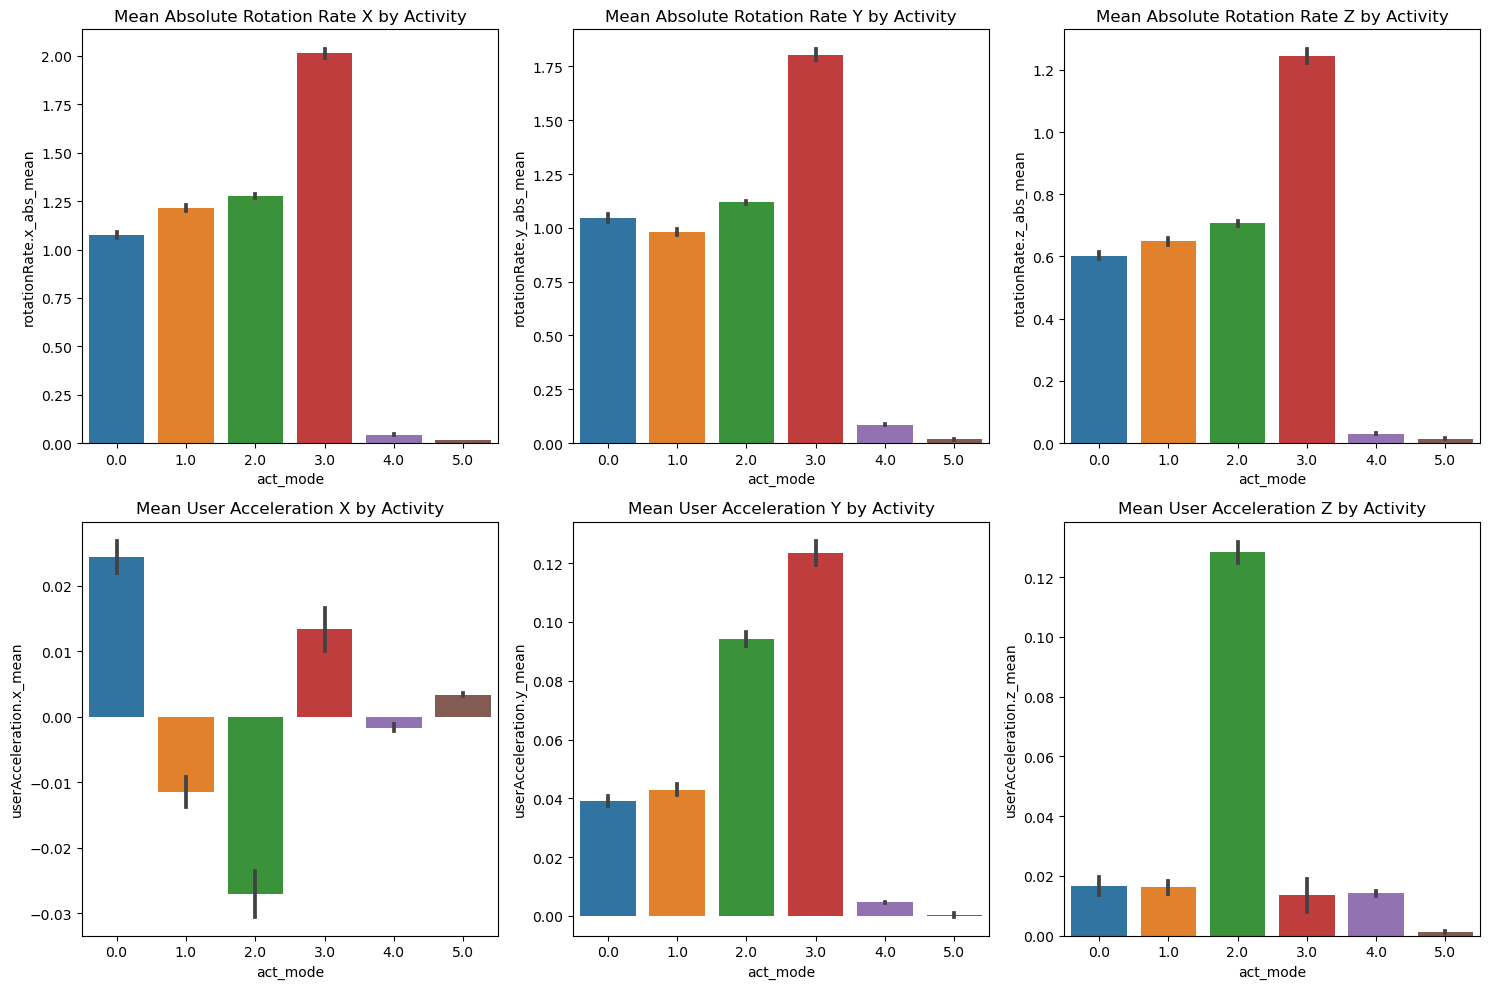

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting mean absolute rotation rates and accelerations for each activity
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mean Absolute Rotation Rates
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.x_abs_mean', ax=axs[0,0])
axs[0,0].set_title('Mean Absolute Rotation Rate X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.y_abs_mean', ax=axs[0,1])
axs[0,1].set_title('Mean Absolute Rotation Rate Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='rotationRate.z_abs_mean', ax=axs[0,2])
axs[0,2].set_title('Mean Absolute Rotation Rate Z by Activity')

# Mean User Accelerations
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.x_mean', ax=axs[1,0])
axs[1,0].set_title('Mean User Acceleration X by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.y_mean', ax=axs[1,1])
axs[1,1].set_title('Mean User Acceleration Y by Activity')
sns.barplot(data=abs_windowed_statistics, x='act_mode', y='userAcceleration.z_mean', ax=axs[1,2])
axs[1,2].set_title('Mean User Acceleration Z by Activity')

plt.tight_layout()
plt.show()



#Absolute mean of rotation rate:
#On the X, Y, Z axes, the absolute average rotation rate of jog (jogging) is significantly higher than other activities. This means that when jogging, the device rotates harder on the X, Y, Z axes.
#On the X, Y, Z axes, the absolute average rotation rate of dws (downstairs), ups (upstairs) and wlk(walking) is relatively high, which may be due to the steps and the back and forth swing of the body when going up and down stairs, and similar with walking.
#On the X, Y, Z axes, the absolute average rotation rate of stand and sit is relatively low, this means that when they are at low values, the behavior is more like sitting or standing.

#User acceleration average:
#On the Y-axis, the average acceleration of users in dws (going downstairs) is higher, which may be due to the added effect of gravity when going downstairs.
#On the Z-axis, the average user acceleration values of walk is relatively high.




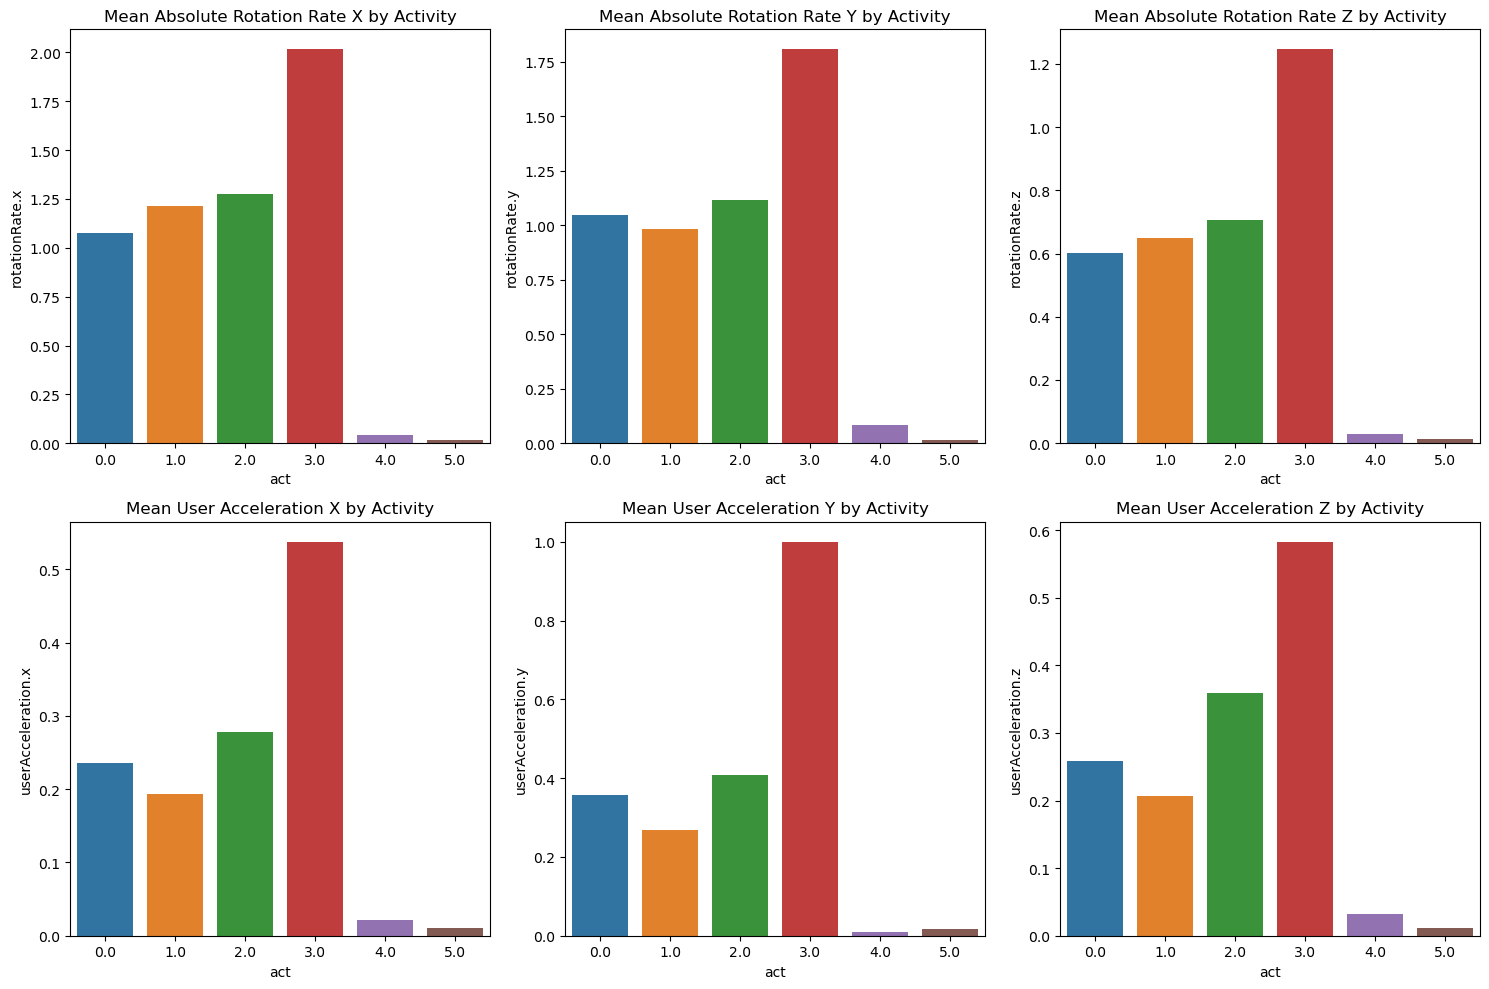

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("clean.csv")

# Compute the mean values with absolute values for rotation rates and user accelerations for each activity
abs_mean_values = data.groupby('act').agg({
    'rotationRate.x': lambda x: abs(x).mean(),
    'rotationRate.y': lambda x: abs(x).mean(),
    'rotationRate.z': lambda x: abs(x).mean(),
    'userAcceleration.x': lambda x: abs(x).mean(),
    'userAcceleration.y': lambda x: abs(x).mean(),
    'userAcceleration.z': lambda x: abs(x).mean()
}).reset_index()

# Plotting mean absolute rotation rates and accelerations for each activity
fig, axs = plt.subplots(2, 3, figsize=(15,10))

# Mean Absolute Rotation Rates
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.x', ax=axs[0,0])
axs[0,0].set_title('Mean Absolute Rotation Rate X by Activity')
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.y', ax=axs[0,1])
axs[0,1].set_title('Mean Absolute Rotation Rate Y by Activity')
sns.barplot(data=abs_mean_values, x='act', y='rotationRate.z', ax=axs[0,2])
axs[0,2].set_title('Mean Absolute Rotation Rate Z by Activity')

# Mean User Accelerations
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.x', ax=axs[1,0])
axs[1,0].set_title('Mean User Acceleration X by Activity')
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.y', ax=axs[1,1])
axs[1,1].set_title('Mean User Acceleration Y by Activity')
sns.barplot(data=abs_mean_values, x='act', y='userAcceleration.z', ax=axs[1,2])
axs[1,2].set_title('Mean User Acceleration Z by Activity')

plt.tight_layout()
plt.show()


#This is data without any windowing processing.
#It can be found from all the figures that only when jogging
#the data measured by all sensors are the highest, while std and sit are the lowest.


